In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:/Users/hp/Desktop/EXCELR DATA SCIENCE/R AND PYTHON BY EXCELR/PYTHON Batch 2/data/market_3.csv")
df

,Region,Product,Subsidiary,Stores,Sales,Inventory,Returns
0,Africa,Boot,Addis Ababa,12,29761,191821,769
1,Africa,Men's Casual,Addis Ababa,4,67242,118036,2284
2,Africa,Men's Dress,Addis Ababa,7,76793,136273,2433
3,Africa,Sandal,Addis Ababa,10,62819,204284,1861
4,Africa,Slipper,Addis Ababa,14,68641,279795,1771
...,...,...,...,...,...,...,...
385,Western Europe,Sandal,Rome,3,1249,4611,48
386,Western Europe,Slipper,Rome,13,42442,132283,1829
387,Western Europe,Sport Shoe,Rome,14,9969,74848,549
388,Western Europe,Women's Casual,Rome,2,19964,62256,954


In [27]:
print(list(df))
print(df.shape)
print(df.tail())
print(df.info())

['Region', 'Product', 'Subsidiary', 'Stores', 'Sales', 'Inventory', 'Returns']
(390, 7)
             Region         Product Subsidiary  Stores   Sales  Inventory  \
385  Western Europe          Sandal       Rome       3    1249       4611   
386  Western Europe         Slipper       Rome      13   42442     132283   
387  Western Europe      Sport Shoe       Rome      14    9969      74848   
388  Western Europe  Women's Casual       Rome       2   19964      62256   
389  Western Europe   Women's Dress       Rome      16  106676     389861   

     Returns  
385       48  
386     1829  
387      549  
388      954  
389     3160  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      390 non-null    object
 1   Product     390 non-null    object
 2   Subsidiary  390 non-null    object
 3   Stores      390 non-null    int64 
 4   Sales     

In [7]:
df.describe()

,Stores,Sales,Inventory,Returns
count,390.000000,390.000000,3.900000e+02,390.000000
mean,11.502564,76313.023077,2.261371e+05,2659.658974
std,8.804868,95418.194363,2.679502e+05,3323.966711
min,1.000000,325.000000,3.740000e+02,10.000000
25%,3.000000,15124.500000,4.264050e+04,575.000000
50%,10.000000,38005.500000,1.181490e+05,1407.000000
75%,17.000000,104344.750000,3.280922e+05,3438.500000
max,41.000000,502636.000000,1.555357e+06,20470.000000


In [18]:
df.nunique()

Region         10
Product         8
Subsidiary     53
Stores         33
Sales         387
Inventory     390
Returns       367
dtype: int64

In [19]:
df.isnull().sum()

Region        0
Product       0
Subsidiary    0
Stores        0
Sales         0
Inventory     0
Returns       0
dtype: int64

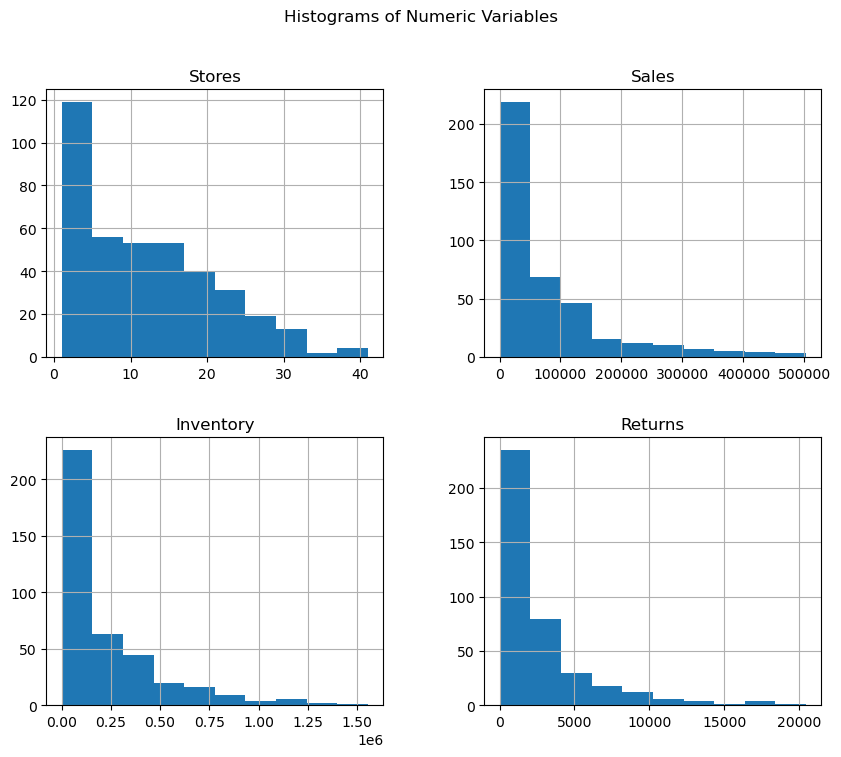

In [28]:
# Visualize the distribution of numeric variables using histograms
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


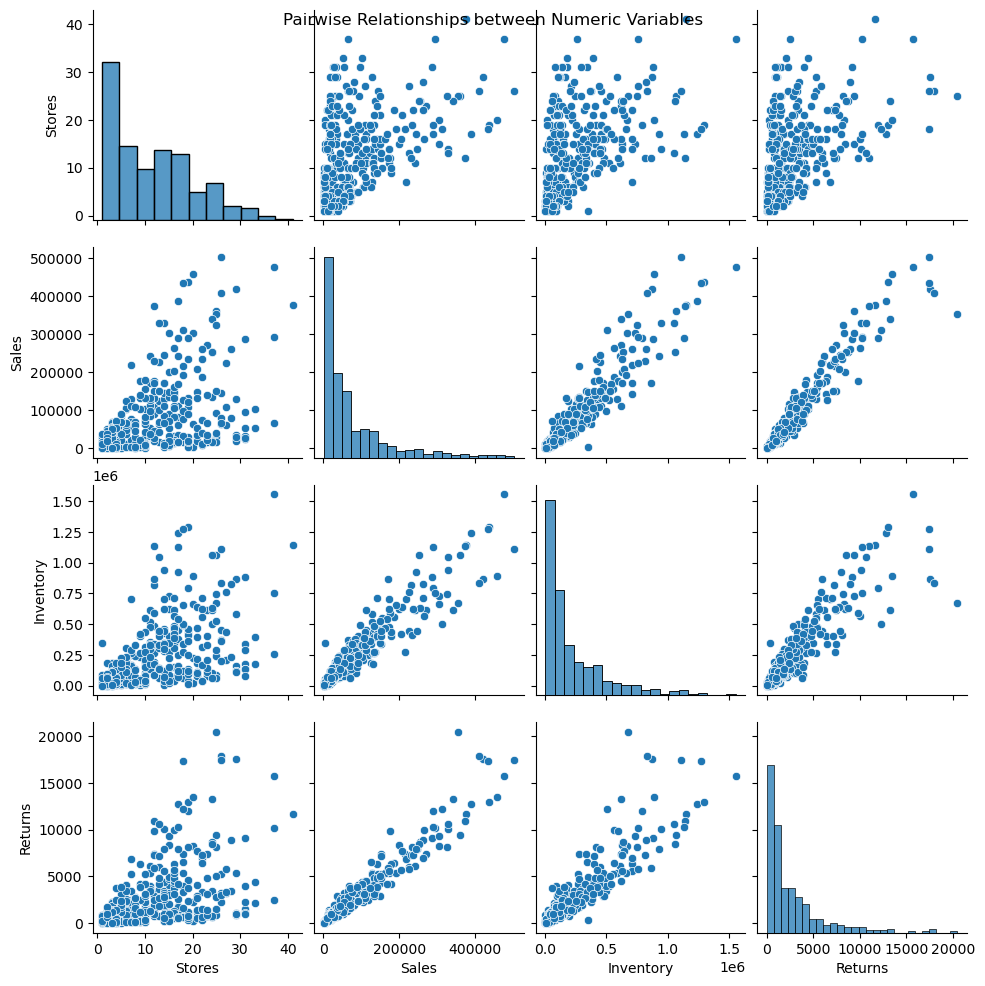

In [29]:
# Visualize the pairwise relationships between numeric variables using a scatterplot matrix
sns.pairplot(df)
plt.suptitle('Pairwise Relationships between Numeric Variables')
plt.show()

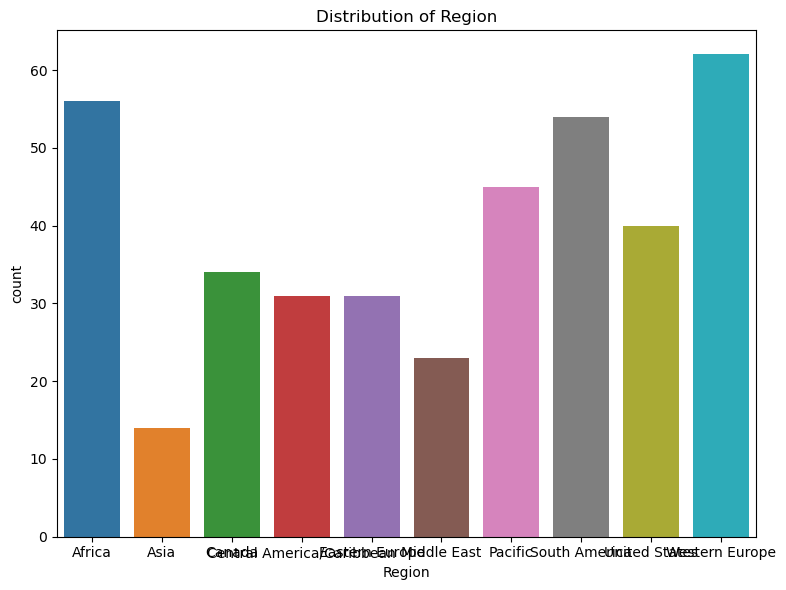

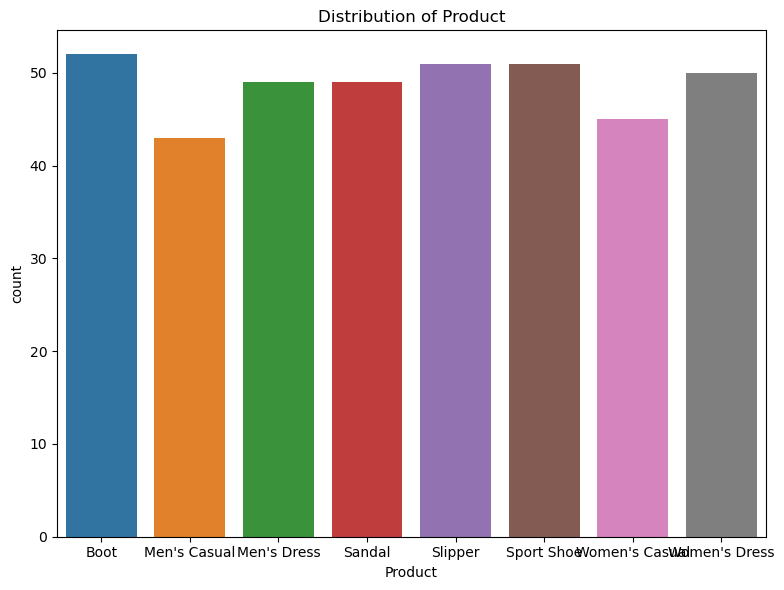

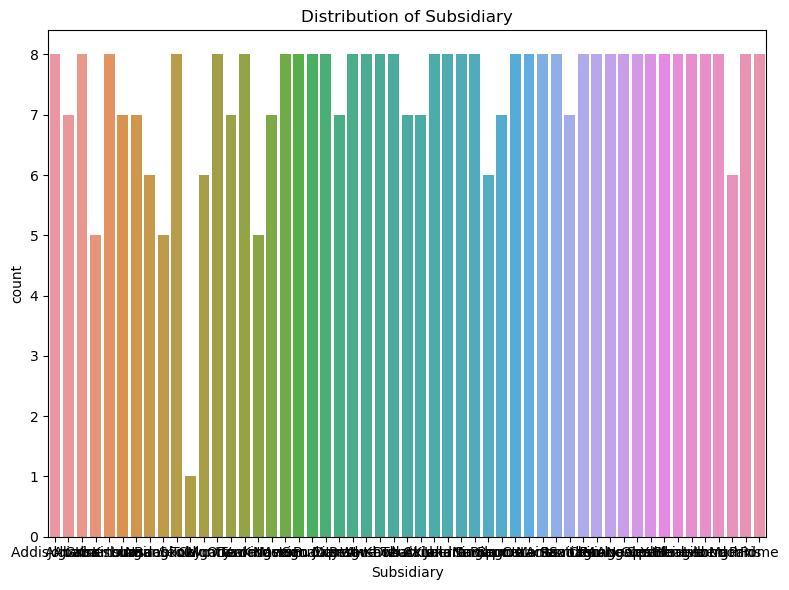

In [36]:
# Visualize the distribution of categorical variables using count plots
categorical_columns = ['Region', 'Product', 'Subsidiary']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

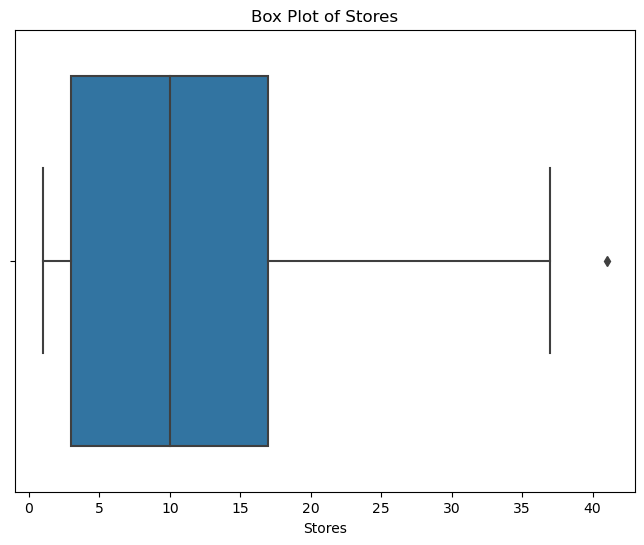

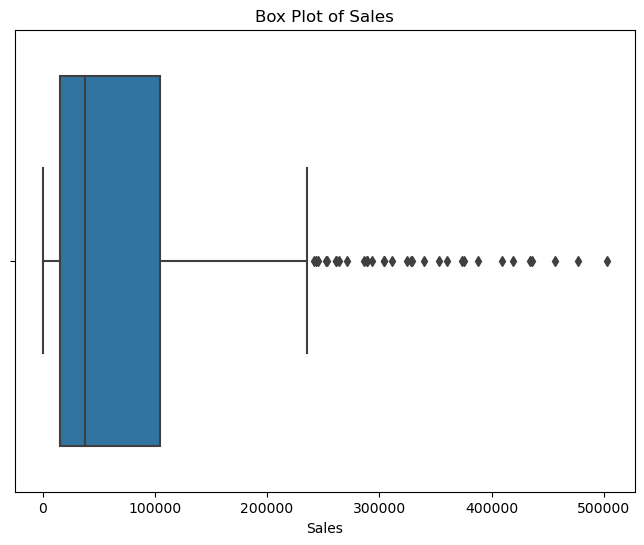

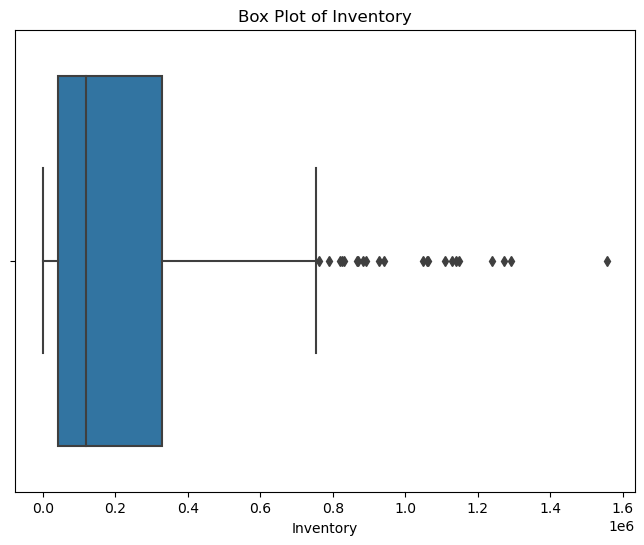

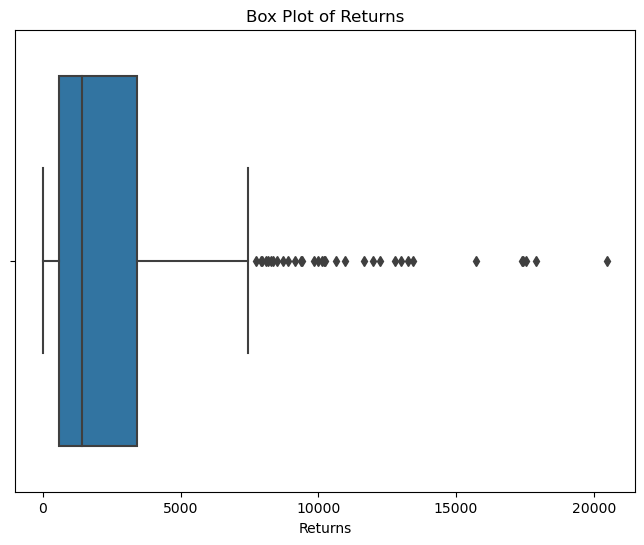

In [31]:
# Visualize the distribution of numeric variables using box plots
numeric_columns = ['Stores', 'Sales', 'Inventory', 'Returns']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [32]:
# Detect outliers using the interquartile range (IQR) method
outlier_threshold = 1.5 

outliers = pd.DataFrame()

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR
    
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = pd.concat([outliers, column_outliers])

In [33]:
# Display the rows containing outliers
print("Rows containing outliers:")
print(outliers)

# Filter out rows containing outliers
df_no_outliers = df[~df.index.isin(outliers.index)]

# Display the cleaned dataset without outliers
print("\nDataset without outliers:")
print(df_no_outliers)

Rows containing outliers:
                        Region         Product  Subsidiary  Stores   Sales  \
110  Central America/Caribbean   Women's Dress    Kingston      41  375817   
16                      Africa    Men's Casual       Cairo      25  360209   
21                      Africa  Women's Casual       Cairo      14  328474   
99                      Canada            Boot   Vancouver      31  286497   
100                     Canada    Men's Casual   Vancouver      25  353361   
..                         ...             ...         ...     ...     ...   
319              United States   Women's Dress    New York      17  288972   
334             Western Europe  Women's Casual  Copenhagen      26  502636   
345             Western Europe    Men's Casual  Heidelberg      12  175694   
348             Western Europe         Slipper  Heidelberg      17  243342   
353             Western Europe    Men's Casual      Lisbon      18  311341   

     Inventory  Returns  
110    1147

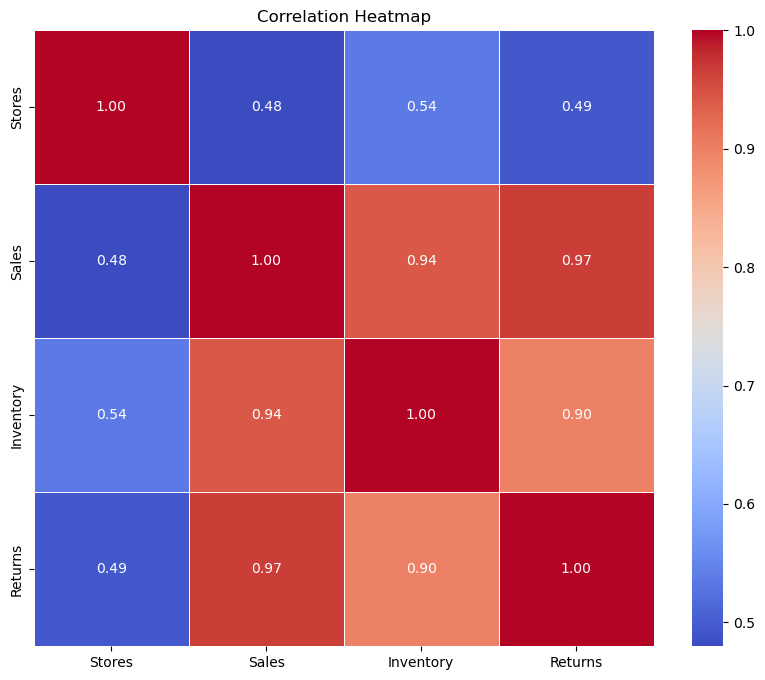

In [35]:

# Calculate the correlation matrix
correlation_matrix = df._get_numeric_data().corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()